<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/TimeSeriseBaseline11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None


In [50]:
df = pd.read_csv('/content/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [51]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


#Plot data with train/test split#

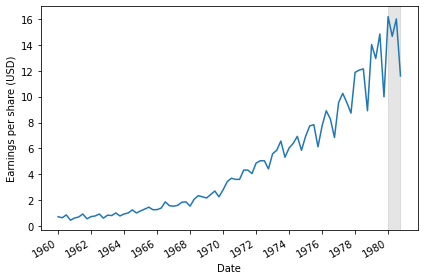

In [52]:
fig, ax = plt.subplots()

ax.plot(df['date'],df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080',alpha=0.2)

plt.xticks(np.arange(0, 81, 8),[1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978,1980])

fig.autofmt_xdate()
fig.tight_layout()





#Split to train/test#

In [53]:
train = df[:-4]
test = df[-4:]

#Predict historical mean#

In [54]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [55]:
test.loc[:,'pred_mean'] = historical_mean

test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [56]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
mape_hist_mean = mape(test['data'],test['pred_mean'])
mape_hist_mean

70.00752579965119

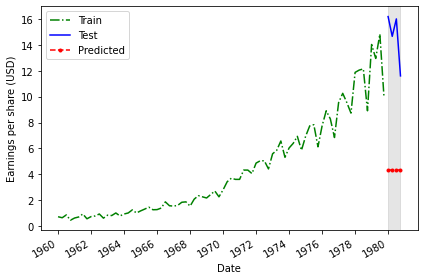

In [58]:
fig, ax = plt.subplots()

ax.plot(train['date'],train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'],test['pred_mean'], 'r--.', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 81, 8),[1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978,1980])

fig.autofmt_xdate()
fig.tight_layout()

#Predict last year mean#

In [59]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [60]:
test.loc[:,'pred_last_yr_mean'] = last_year_mean 

test

,date,data,pred_mean,pred_last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [61]:
mape_last_year_mean = mape(test['data'],test['pred_last_yr_mean'])
mape_last_year_mean

15.5963680725103

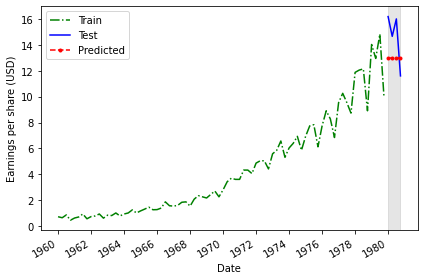

In [63]:
fig, ax = plt.subplots()

ax.plot(train['date'],train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'],test['pred_last_yr_mean'], 'r--.', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080',alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8),[1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978,1980])

fig.autofmt_xdate()
fig.tight_layout()